Selected Features: ['Accuracy', 'HeadshotRatio', 'KDRatio', 'MovementScore', 'AimCorrectionSpeed', 'WinRate', 'HoursPlayed']

Best Random Forest Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        50
           1       0.92      0.92      0.92        50

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100

ROC-AUC Score: 0.9828
Cross-Validation ROC-AUC: 0.9879 ± 0.0080


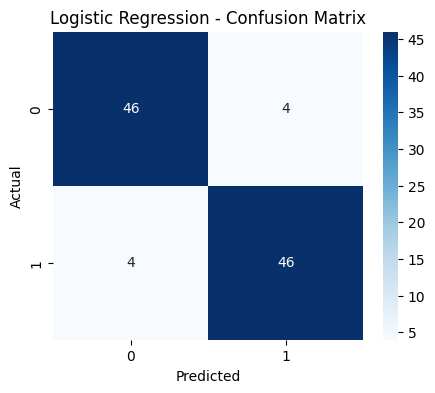


=== Random Forest (Tuned) ===
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        50
           1       0.94      0.94      0.94        50

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

ROC-AUC Score: 0.9712
Cross-Validation ROC-AUC: 0.9775 ± 0.0124


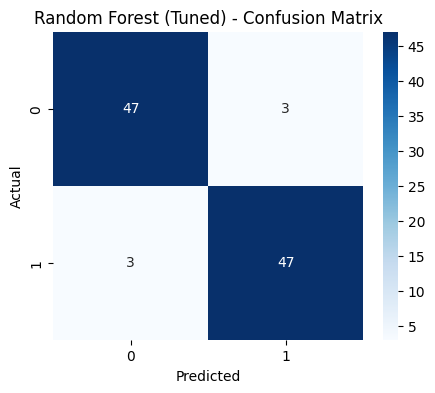


=== SVM ===
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        50
           1       0.86      0.88      0.87        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

ROC-AUC Score: 0.9664
Cross-Validation ROC-AUC: 0.9794 ± 0.0116


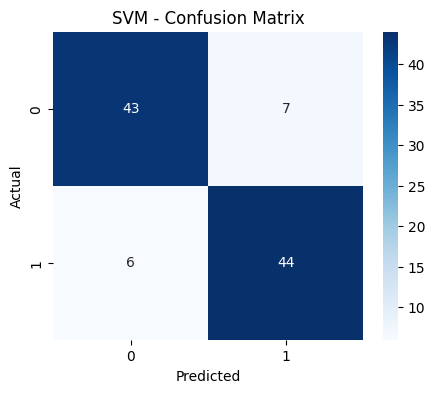


✅ Model Training, Feature Selection, Tuning, and Evaluation Complete!


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = R'h:\AI\cheater detection app\shooter_game_cheater_dataset_balanced_500.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop('Cheater', axis=1)
y = data['Cheater']

# Feature selection using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=7)  # Select top 7 features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {list(selected_features)}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_
print(f"\nBest Random Forest Parameters: {grid_search.best_params_}")

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest (Tuned)': best_rf,
    'SVM': SVC(probability=True, random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"\n=== {model_name} ===")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Evaluation
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC Score: {auc:.4f}")

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    print(f"Cross-Validation ROC-AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print("\n✅ Model Training, Feature Selection, Tuning, and Evaluation Complete!")


In [3]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import joblib

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],          # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers to try
    'max_iter': [100, 500, 1000] # Number of iterations
}

# Grid Search with cross-validation
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Best model after tuning
best_model = grid_search.best_estimator_
print(f"✅ Best Model: {best_model}")

# Train the best model on the entire balanced dataset
best_model.fit(X_resampled, y_resampled)

# Save the best model and the scaler
joblib.dump(best_model, 'cheater_detector.pkl')  # Save model
joblib.dump(scaler, 'scaler.pkl')                # Save scaler

print("🎉 Model and Scaler Saved Successfully!")


✅ Best Model: LogisticRegression(C=0.1, random_state=42, solver='liblinear')
🎉 Model and Scaler Saved Successfully!
